# Analyzing Survey Data about Star Wars Movies

The FiveThirtyEight team surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, and they made their data available at their GitHub repository. I have downloaded their CSV file and we will be cleaning and exploring the data set below. Let's start by reading the data into a pandas dataframe:

In [91]:
import pandas as pd
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")
star_wars.shape

(1187, 38)

In [92]:
import numpy as np

We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. 

In [93]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


First, we'll need to remove some invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. We need to remove any rows with an invalid RespondentID.

In [94]:
star_wars = star_wars.dropna(subset=["RespondentID"])
star_wars.shape

(1186, 38)

In [95]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Let's look at the following two columns in the dataset which are just after RespondentID:
- "Have you seen any of the 6 films in the Star Wars franchise?"
- "Do you consider yourself to be a fan of the Star Wars film franchise?"

These can be Yes/No/NaN questions per the responses by those surveyed, and we can clean these two columns up by turning them into corresponding True/False/NaN values

In [96]:
yes_no = {"Yes": True,"No": False, True:True, False:False}

In [97]:
update_col_list = [ "Have you seen any of the 6 films in the Star Wars franchise?",
                    "Do you consider yourself to be a fan of the Star Wars film franchise?"
                    ]
for col in update_col_list:
    star_wars[col] = star_wars[col].map(yes_no)
star_wars[update_col_list].head(10)

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True
10,True,False


In [98]:
star_wars[update_col_list[0]].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [99]:
star_wars[update_col_list[1]].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We can convert each of these columns to a Boolean, then rename the column something more intuitive.

In [100]:
update_col_list = star_wars.columns[3:9]
update_col_list

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [102]:
star_wars[update_col_list].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
6,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
7,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
8,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
9,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
10,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN


In [104]:
movie_map = {"Star Wars: Episode I  The Phantom Menace": True,
             "Star Wars: Episode II  Attack of the Clones": True,
             "Star Wars: Episode III  Revenge of the Sith": True,
             "Star Wars: Episode IV  A New Hope": True,
             "Star Wars: Episode V The Empire Strikes Back": True,
             "Star Wars: Episode VI Return of the Jedi": True,
             np.nan: False,
             True:True, False:False}
for col in update_col_list:
    star_wars[col] = star_wars[col].map(movie_map)
star_wars[update_col_list].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [119]:
new_col_names = ["seen_{}".format(i) for i in range(1,7)]
new_col_names

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

In [107]:
new_col_mapping = dict(zip(update_col_list,new_col_names))
new_col_mapping

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [108]:
star_wars.rename(columns=new_col_mapping, inplace=True)

In [124]:
star_wars[new_col_names].head(10)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. Each of these columns can contain the value 1, 2, 3, 4, 5, 6, or NaN, so we could easily convert each column to a numeric type, and then rename the columns so that the column names are easier to read and understand.

In [125]:
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [126]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
new_col_names = ["ranking_{}".format(i) for i in range(1,7)]
new_col_mapping = dict(zip(star_wars.columns[9:15],new_col_names))
new_col_mapping

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
 'Unnamed: 10': 'ranking_2',
 'Unnamed: 11': 'ranking_3',
 'Unnamed: 12': 'ranking_4',
 'Unnamed: 13': 'ranking_5',
 'Unnamed: 14': 'ranking_6'}

In [127]:
star_wars.rename(columns=new_col_mapping, inplace=True)

In [128]:
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


In [129]:
star_wars[star_wars.columns[9:15]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
ranking_1    835 non-null float64
ranking_2    836 non-null float64
ranking_3    835 non-null float64
ranking_4    836 non-null float64
ranking_5    836 non-null float64
ranking_6    836 non-null float64
dtypes: float64(6)
memory usage: 64.9 KB


Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. 

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

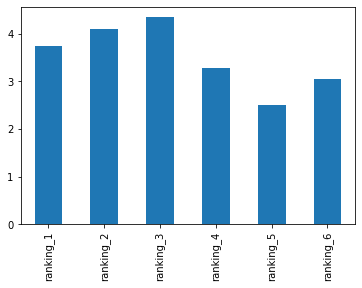

In [131]:
star_wars[star_wars.columns[9:15]].mean().plot(kind="bar")